In [1]:
import md_manager as md
from md_manager import CUTABI

import matplotlib.pyplot as plt

### Reading DataFrames:

In [2]:
df = md.fetch_PDB("4png", atom_only=True)
df

,record_name,name,alt,resn,chain,resi,insertion,x,y,z,occupancy,b,segi,e,q
atom_id,,,,,,,,,,,,,,,
1,ATOM,N,,LYS,A,3,,1.856,13.727,-6.218,1.0,31.43,,N,
2,ATOM,CA,,LYS,A,3,,2.299,13.005,-5.003,1.0,29.48,,C,
3,ATOM,C,,LYS,A,3,,1.674,13.602,-3.712,1.0,28.30,,C,
4,ATOM,O,,LYS,A,3,,0.700,14.378,-3.767,1.0,29.81,,O,
5,ATOM,CB,,LYS,A,3,,3.823,13.002,-4.918,1.0,30.64,,C,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,ATOM,O,,ASN,B,223,,-15.713,27.149,36.891,1.0,47.44,,O,
3608,ATOM,CB,,ASN,B,223,,-15.277,30.253,35.995,1.0,52.19,,C,
3609,ATOM,CG,,ASN,B,223,,-15.465,31.470,35.116,1.0,55.12,,C,


Exemples of quick manipulations that are extremely useful when working with proteins.

In [3]:
# check for alternate locations:
print(df.alt.unique())

# Only consider one possible loacation per atom
df = df.query("alt in ['', 'A']")
print(df.alt.unique())

['' 'A' 'B']
['' 'A']


In [4]:
# Check for missing residues:
df.query("name == 'CA'")["resi"].diff().max() # if == 1.0 => no missing residues in the middle of the chains

1.0

<Axes: xlabel='Residue index', ylabel='Thermal factor [$\\AA^2$]'>

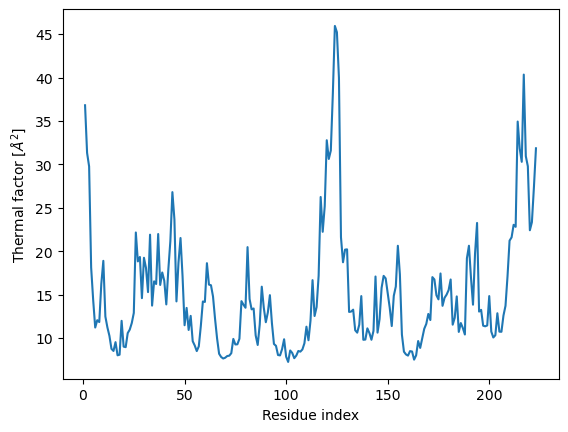

In [5]:
# plot thermal factors:
df.groupby("resi").b.mean().plot(ylabel="Thermal factor [$\\AA^2$]", xlabel = "Residue index")

In [9]:
df.segi.unique()

array([''], dtype=object)

### Confomational Angles:

In [10]:
df.groupby("chain")[["x", "y", "z", "name", "resi"]].apply(md.chain_phi_psi_omega)

Phi         Psi       Omega
chain resi                                    
A     3            NaN -166.232478 -165.037559
      4    -108.450111  144.966396  169.087895
      5    -122.486413  127.407233  173.692740
      6    -104.814905  124.850034  176.893256
      7    -103.694983  129.022927  177.343863
...                ...         ...         ...
B     219  -137.313597  153.562548  170.717308
      220   -95.257345  137.046339  172.320087
      221   -69.437945  144.807457  176.709905
      222   -74.739074  -25.463276  171.923227
      223  -143.620937         NaN         NaN

[444 rows x 3 columns]

In [11]:
md.backbone_conformation(df)

theta       gamma
chain resi                        
A     3            NaN         NaN
      4     136.694043 -163.690836
      5     122.209591 -161.671889
      6     115.893723 -159.033144
      7     119.849493   64.289395
...                ...         ...
B     219   133.560573 -126.657070
      220   119.005087 -120.746527
      221   115.346915 -137.100739
      222    89.368943         NaN
      223          NaN         NaN

[444 rows x 2 columns]

In [12]:
md.side_chain_conformation(df)

Chi1        Chi2  Chi3  Chi4  Chi5
chain resi                                          
A     3            NaN         NaN   NaN   NaN   NaN
      4     -61.185067  169.172258   NaN   NaN   NaN
      5     -52.438040  176.210920   NaN   NaN   NaN
      6     176.051484   61.524605   NaN   NaN   NaN
      7     -62.874151   87.888762   NaN   NaN   NaN
...                ...         ...   ...   ...   ...
B     219   -45.884298         NaN   NaN   NaN   NaN
      220   -77.767841  103.582238   NaN   NaN   NaN
      221          NaN         NaN   NaN   NaN   NaN
      222          NaN         NaN   NaN   NaN   NaN
      223   -82.278376  -47.738433   NaN   NaN   NaN

[444 rows x 5 columns]

### CUTABI module

In [13]:
df["alpha"] = CUTABI.predict_alpha_helix(df)
df["beta"] = CUTABI.predict_beta_sheets(df)
df.query("alpha or beta")

C:\Users\Stage\AppData\Local\Temp\ipykernel_14464\2209550050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alpha"] = CUTABI.predict_alpha_helix(df)
C:\Users\Stage\AppData\Local\Temp\ipykernel_14464\2209550050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["beta"] = CUTABI.predict_beta_sheets(df)


,record_name,name,alt,resn,chain,resi,insertion,x,y,z,occupancy,b,segi,e,q,alpha,beta
atom_id,,,,,,,,,,,,,,,,,
7,ATOM,CA,,LEU,A,4,,1.527,13.447,-1.283,1.0,21.24,,C,,False,True
15,ATOM,CA,,ILE,A,5,,1.869,16.199,1.293,1.0,14.81,,C,,False,True
23,ATOM,CA,,LEU,A,6,,1.675,15.513,5.035,1.0,12.10,,C,,False,True
31,ATOM,CA,,TYR,A,7,,0.977,18.532,7.244,1.0,10.99,,C,,False,True
79,ATOM,CA,,PRO,A,13,,1.369,11.254,18.065,1.0,10.20,,C,,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,ATOM,CA,,ILE,B,213,,-29.798,11.444,33.168,1.0,22.78,,C,,True,False
3525,ATOM,CA,,ARG,B,214,,-32.598,13.662,34.545,1.0,30.55,,C,,True,False
3536,ATOM,CA,,GLU,B,215,,-32.597,11.450,37.704,1.0,33.70,,C,,True,False


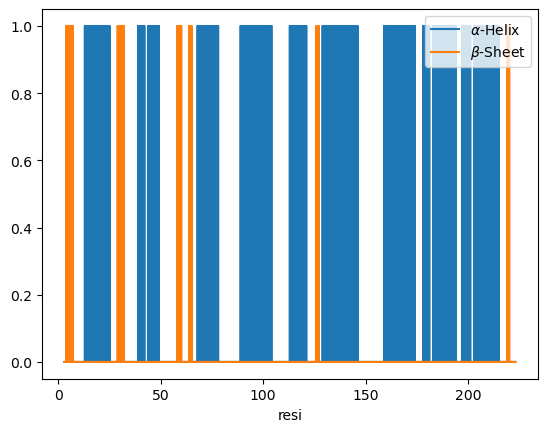

In [14]:
fig, ax = plt.subplots()
sele = df.query("chain == 'A'").copy()
sele["alpha"] = sele.alpha.astype(int)
sele["beta"] = sele.beta.astype(int)

sele.plot("resi", "alpha", ax=ax, label="$\\alpha$-Helix")
sele.plot("resi", "beta", ax=ax, label="$\\beta$-Sheet")
ax.legend(loc="upper right")